In [1]:
conda list

# packages in environment at /opt/anaconda3/envs/deep_learning:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0  
absl-py                   2.1.0           py312hca03da5_0  
ace-tools                 0.0                      pypi_0    pypi
aext-assistant            4.1.0           py312hca03da5_jl4_0  
aext-assistant-server     4.1.0           py312hca03da5_0  
aext-core                 4.1.0           py312hca03da5_jl4_0  
aext-core-server          4.1.0           py312hca03da5_0  
aext-panels               4.1.0           py312hca03da5_0  
aext-panels-server        4.1.0           py312hca03da5_0  
aext-project-filebrowser-server 4.1.0           py312hb41f31a_0  
aext-share-notebook       4.1.0           py312hca03da5_0  
aext-share-notebook-server 4.1.0           py312hca03da5_0  
aext-shared               4.1.0           py312hca03da5_0  
aiohappyeyeballs          2.4.4           py312hca03da5_0  
aiohtt

In [11]:
import numpy as np
import scipy.linalg as la
import contextlib, io

np.set_printoptions(threshold=np.inf, linewidth=10**6, precision=4, suppress=True)

def p(name, x):
    print(name)
    if isinstance(x, np.ndarray):
        # full, no ellipsis
        print(np.array2string(x, threshold=np.inf, max_line_width=10**6,
                              precision=4, suppress_small=True))
    else:
        print(x)
    print()

buf = io.StringIO()
with contextlib.redirect_stdout(buf):
    rng = np.random.default_rng(0)
    a0 = rng.random((21,9)); b0 = rng.random((21,9)); v = rng.random(9)
    A  = rng.random((3,3));  B  = rng.random((3,3));  b = rng.normal(size=(3,))
    ac = rng.random((3,3)) + 1j*rng.random((3,3))

    p("a0.shape / b0.shape / v.shape", np.array([a0.shape, b0.shape, v.shape], dtype=object))
    p("ndims(a0)", np.ndim(a0)); p("numel(a0)", np.size(a0)); p("size(a0)", np.array(a0.shape))
    p("size(a0,2)", a0.shape[1])

    p("np.array([[1,2,3],[4,5,6]])", np.array([[1,2,3],[4,5,6]]))
    p("np.block([[I,1],[2,3I]])", np.block([[np.eye(2), np.ones((2,2))],
                                            [2*np.ones((2,2)), 3*np.eye(2)]]))

    a = a0.copy()
    p("a[-1]", a[-1]); p("a[1,4]", a[1,4]); p("a[1,:]", a[1,:]); p("a[:5,:]", a[:5,:])
    p("a[-5:,:]", a[-5:,:]); p("a[0:3,4:9]", a[0:3,4:9])
    p("a[np.ix_([1,3,4],[0,2])]", a[np.ix_([1,3,4],[0,2])])
    p("a[2:21:2,:]", a[2:21:2,:]); p("a[::2,:]", a[::2,:]); p("a[::-1,:]", a[::-1,:])
    p("a[np.r_[:len(a),0],:]", a[np.r_[:len(a),0],:])

    p("a.T", a.T); p("ac.conj().T", np.conjugate(ac).T)

    p("A @ B", A @ B); p("A * B", A * B); p("A / B", A / B); p("A**3", A**3)

    p("(a0 > 0.5)", (a0 > 0.5).astype(int))
    cols = np.nonzero(v > 0.5)[0]; p("np.nonzero(a0>0.5)", np.array([*np.nonzero(a0>0.5)], dtype=object))
    p("a0[:, cols]", a0[:, cols]); p("a0[:, v>0.5]", a0[:, v>0.5])

    a = a0.copy(); a[a < 0.5] = 0; p("a[a<0.5]=0", a)
    p("a0 * (a0>0.5)", a0 * (a0 > 0.5))
    a = a0.copy(); a[:] = 3; p("a[:]=3", a)

    x = a0.copy(); y_view = x[1,:].copy(); y_ref = x[1,:]
    x[1,0] = 123.456; p("y_view[0] / y_ref[0]", np.array([y_view[0], y_ref[0]]))

    p("x.flatten()", x.flatten()); p("x.flatten('F')", x.flatten('F'))

    p("solve(A,b)", la.solve(A,b)); p("inv(A)", la.inv(A)); p("det(A)", la.det(A))
    p("trace(A)", np.trace(A)); p("rank(A)", np.linalg.matrix_rank(A))
    p("norms [2, fro, 1, inf]", np.array([la.norm(A,2), la.norm(A,'fro'),
                                          la.norm(A,1), la.norm(A,np.inf)]))
    w,V = la.eig(A); p("eig(A): w", w); p("eig(A): V", V)
    U,s,Vh = la.svd(A); p("svd s", s); p("svd U", U); p("svd Vh", Vh)
    Q,R = la.qr(A); p("qr R", R)
    S = A.T@A + np.eye(3); p("cholesky(S)", la.cholesky(S))
    p("pinv(A)", la.pinv(A))

# write full output (no truncation) to files
text = buf.getvalue()
with open("task2_full_output.txt", "w") as f:
    f.write(text)
with open("task2_full_output.tex", "w") as f:
    f.write("\\begin{verbatim}\n"+text+"\\end{verbatim}\n")

print("Saved full outputs to task2_full_output.txt and task2_full_output.tex")


Saved full outputs to task2_full_output.txt and task2_full_output.tex


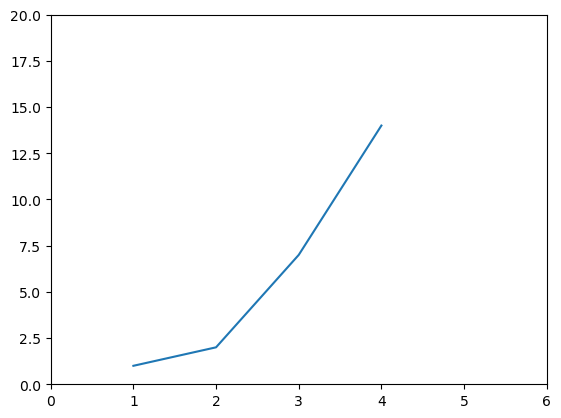

In [13]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], [1,2,7,14])
plt.axis([0, 6, 0, 20])
plt.show()